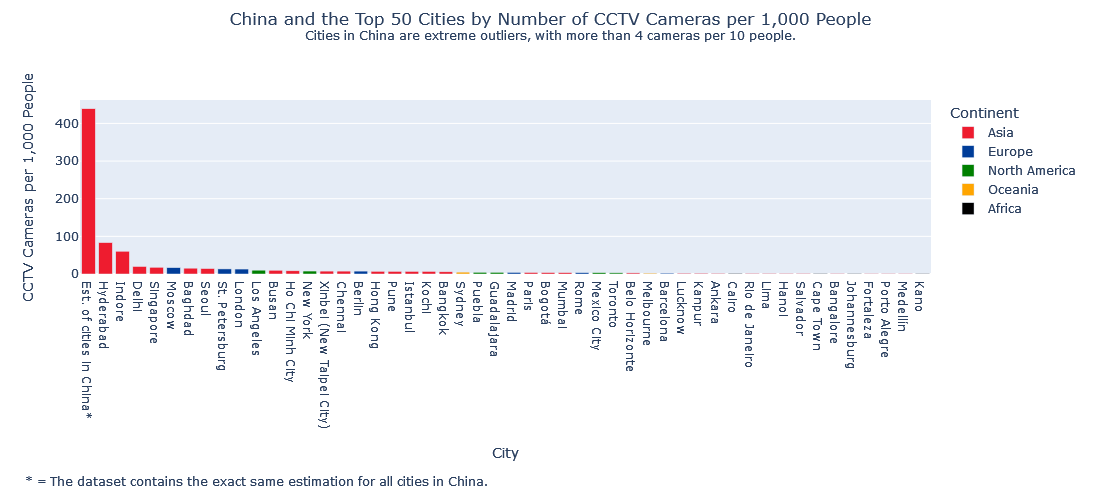

In [25]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

cctv = pd.read_csv("datasets/cctv.csv")

df = cctv

asia = {'Singapore', 'Myanmar', 'Yemen', 'Thailand', 'Philippines', 'Indonesia', 'Israel', 'Iraq', 'Pakistan', 'South Korea', 'India', 'Vietnam', 'Malaysia', 'Saudi Arabia', 'Japan', 'China', 'Taiwan', 'Afghanistan', 'Hong Kong', 'Turkey', 'Bangladesh', 'Iran'}
europe = {'Spain', 'Russia', 'Italy', 'Germany', 'United Kingdom'}
north_america = {'Mexico', 'United States', 'Dominican Republic', 'Canada'}
south_america = {'Mexico', 'United States', 'Dominican Republic', 'Canada'}
africa = {'Kenya', 'Egypt', 'Ethiopia', 'Nigeria', 'Madagascar', 'Burkina Faso', 'South Africa', 'Cameroon', 'Morocco', 'Uganda', 'Sudan', 'Tanzania', 'Angola', 'Senegal'}
oceania = {'Australia'}

# Map each country to its continent
def get_continent(country):
    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in oceania:
        return 'Oceania'
    else:
        return 'Asia'

df['Continent'] = df['Country'].apply(get_continent)

# Exclude cities in China
df_non_china = df[df['Country'] != 'China']

# Calculate the mean value for cities in China
china_mean = df[df['Country'] == 'China']['# of CCTV Cameras per 1,000 People'].mean()

# Create a new DataFrame for the mean value
mean_china_df = pd.DataFrame({
    'City': ['Est. of cities in China*'],
    '# of CCTV Cameras per 1,000 People': [china_mean],
    'Continent': ['Asia'],
    'Country': ['China']
})

# Concatenate the two DataFrames
final_df = pd.concat([df_non_china, mean_china_df], ignore_index=True)

# Sort the DataFrame by the number of CCTV cameras per 1,000 people
final_df = final_df.sort_values(by='# of CCTV Cameras per 1,000 People', ascending=False)

# Select the top 50 values
top_50_df = final_df.head(50)

# COLORS
# Define custom colors for each continent
color_map = {
    'Asia': 'rgb(238, 28, 47)',
    'Europe': 'rgb(0, 61, 153)',
    'North America': 'green',
    'South America': 'yellow',
    'Africa': 'black',
    'Oceania': 'orange',
    'Other': 'grey'
}

# Create the bar graph
fig = px.bar(top_50_df, x='City', y='# of CCTV Cameras per 1,000 People', color='Continent',
             title='China and the Top 50 Cities by Number of CCTV Cameras per 1,000 People<br><sup>Cities in China are extreme outliers, with more than 4 cameras per 10 people.</sup>',
             hover_data={'Country': True}, color_discrete_map=color_map,
             labels={'# of CCTV Cameras per 1,000 People': 'CCTV Cameras per 1,000 People'})

# Customize hover label formatting
fig.update_traces(
    hovertemplate='City: %{x}<br>Country: %{customdata[0]}<br># of CCTV Cameras per 1000 people: %{y}'
)


fig.update_layout(
    height = 500,
    xaxis={'categoryorder':'total descending'},
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin={'b': 226, 't': 100}
)

fig.add_annotation(x=-0.07, y=-1.25,
                   xref="paper", yref="paper",
                   align='left',
                   xanchor='left', yanchor='bottom',
                   showarrow=False,
                   text='* = The dataset contains the exact same estimation for all cities in China.'
                  )

fig.show()